In [1]:
import pandas as pd

df = pd.read_csv("../data/delaney-processed.csv")

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import BRICS

In [4]:
mols = [Chem.MolFromSmiles(smi) for smi in df["smiles"]]

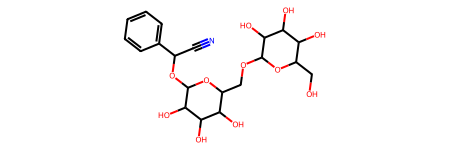

In [10]:
mols[0]

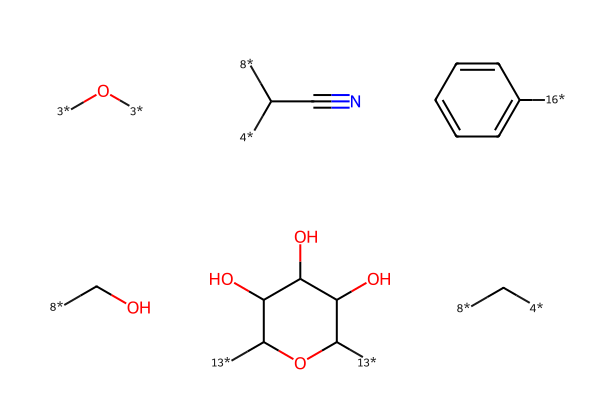

In [9]:
fragment_mols = BRICS.BRICSDecompose(mols[0], returnMols=True)
Draw.MolsToGridImage(fragment_mols, molsPerRow=3)

In [11]:
unique_fragments_smi = set()
for mol in mols:
    frag = BRICS.BRICSDecompose(mol)
    unique_fragments_smi.update(frag)

fragments_mols = [Chem.MolFromSmiles(smi) for smi in unique_fragments_smi]
builder = BRICS.BRICSBuild(fragments_mols)
type(builder)  ### generator

generator

In [12]:
generated_mols = []
for i in range(10):
    m = next(builder)
    m.UpdatePropertyCache(strict=True)
    generated_mols.append(m)
    print(f"Generated molecule: {Chem.MolToSmiles(m)}")

Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4OCC(O)C(O)C4O)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4NC(=O)NC4=O)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1OC(c2ccc(-c3cccc4c3OC(C)(C)C4)cc2-c2ccc(C=O)cc2)CC(O)C1O
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4OCCO4)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4OC(O)C(O)C(O)C4O)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C45OC(C)(C)OC4CC4C6CCC7=CC(=O)C=CC7(C)C6(F)C(O)CC45C)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4NC(=O)c5cc(S(N)(=O)=O)c(Cl)cc5N4)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4CC(O)CC(=O)O4)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4CO4)c(-c4ccc(C=O)cc4)c3)c2O1
Generated molecule: CC1(C)Cc2cccc(-c3ccc(C4CC(=O)c5c(O)cc(O)cc5O4)c(-c4ccc(C=O)cc4)c3)c2O1


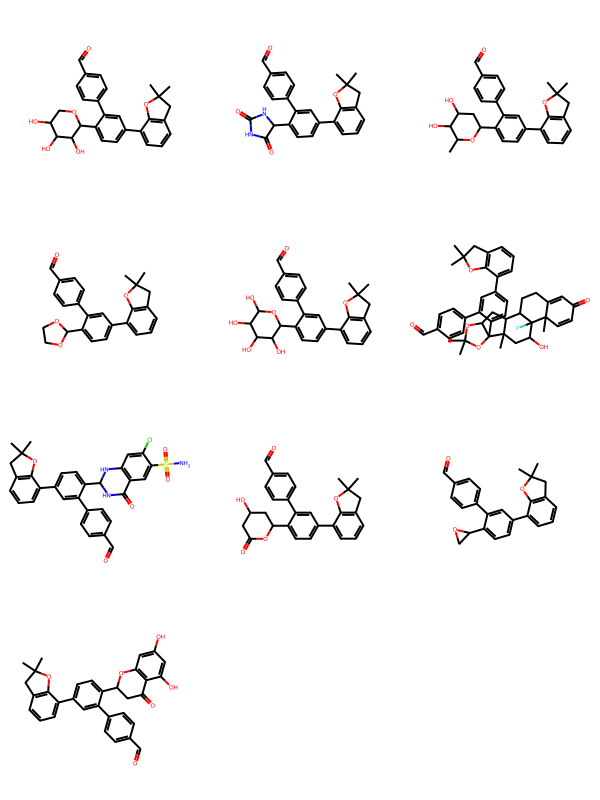

In [13]:
Draw.MolsToGridImage(generated_mols, molsPerRow=3)